In [10]:
import sys
sys.path.insert(0, '../Data')

from fmp_module import *
%matplotlib inline

In [11]:
audio_path = '../Data/MPB Audios/'
label_path = '../Data/MPB Labels/'
var_path = '../Data/Variables/'

audios = var_path + 'tom_audios.txt'
labels = var_path + 'tom_labels.txt'

color_ann = {'N': 'white', 
             'C': 'peru', 'C#': 'springgreen', 'D': 'coral', 
             'D#': 'olive', 'Dm': 'teal', 'Em': 'pink',
             'F': 'greenyellow', 'F#': 'purple','G': 'steelblue', 'G#':'indigo', 
             'Am':'orange', 'A#':'saddlwbrown', 'A#m':'lightcoral'}

song_selected = [0, 1]

In [12]:
audio_list = get_files(audios, audio_path)
label_list = get_files(labels, label_path)
name_list = get_name_list(audio_list)

song_dict = get_song_dict(name_list, audio_list, label_list)
song_dict


{0: ['As Praias Desertas',
  'r',
  '../Data/MPB Audios/Tom Jobim - As Praias Desertas.wav',
  '../Data/MPB Labels/as_praias_desertas.csv'],
 1: ['Aula De Matematica',
  'b',
  '../Data/MPB Audios/Tom Jobim - Aula De Matematica.wav',
  '../Data/MPB Labels/aula_de_matematica.csv']}

In [13]:
print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='STFT')
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='CQT')
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='IIR')

===== Computation of STFT-based chromagrams =====
Processing:  As Praias Desertas
Processing:  Aula De Matematica
===== Computation of CQT-based chromagrams =====
Processing:  As Praias Desertas
Processing:  Aula De Matematica
===== Computation of IIR-based chromagrams =====
Processing:  As Praias Desertas
Processing:  Aula De Matematica


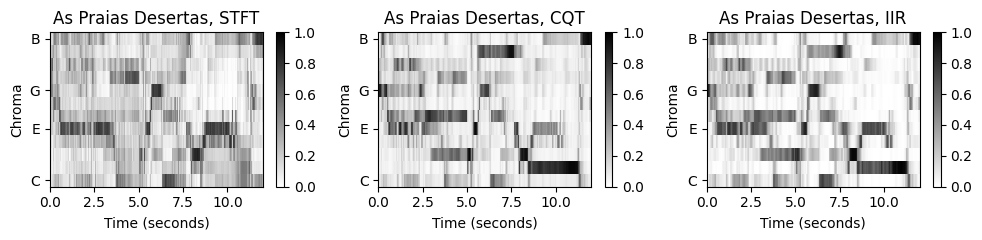

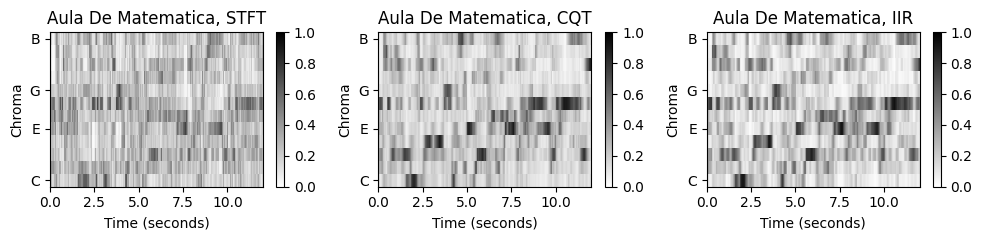

In [14]:
get_chromagrams(song_selected, song_dict, Fs_X_dict_STFT, X_dict_STFT, Fs_X_dict_CQT, X_dict_CQT, Fs_X_dict_IIR, X_dict_IIR)

In [15]:
tr_matrix = '../Data/Matrices/matriz_de_transicao.csv'
df = pd.read_csv(tr_matrix, sep = ',', decimal = '.', header = 0, index_col = 0)

c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)


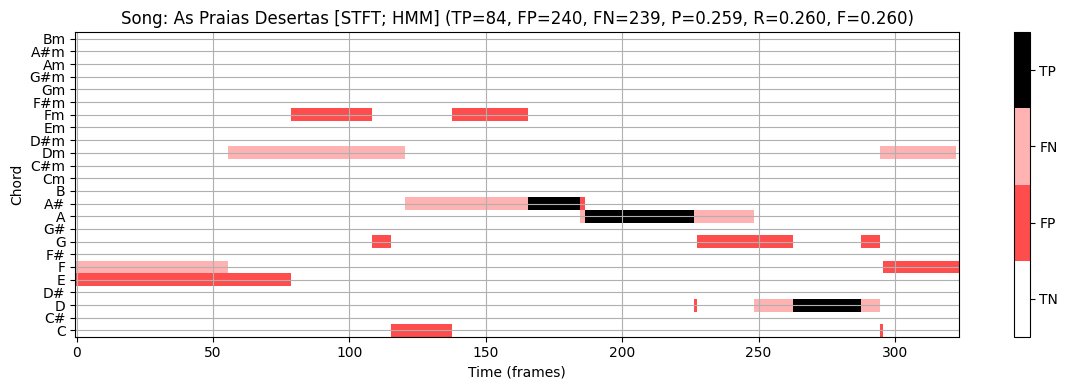

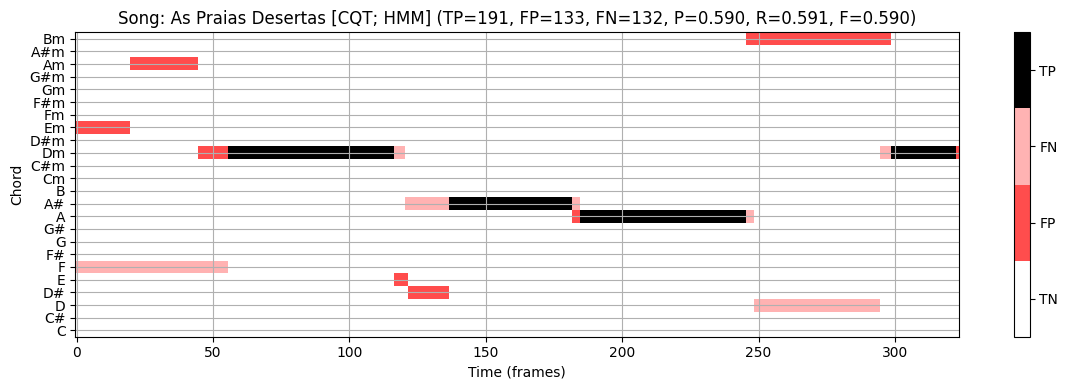

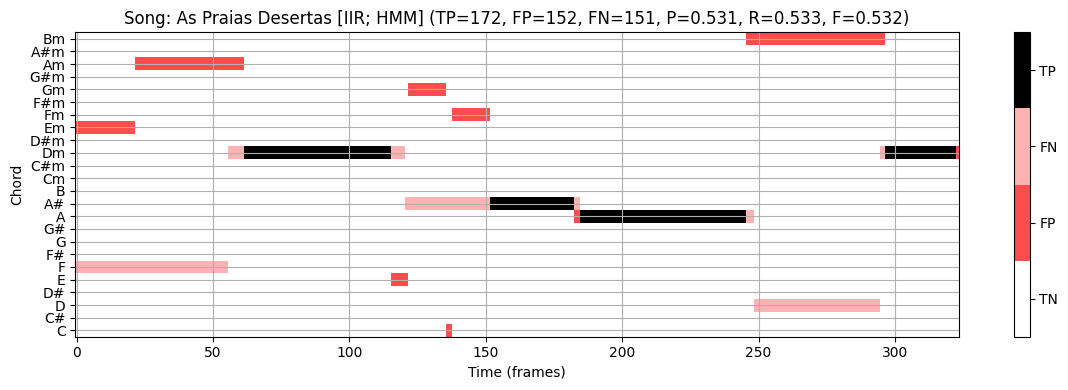

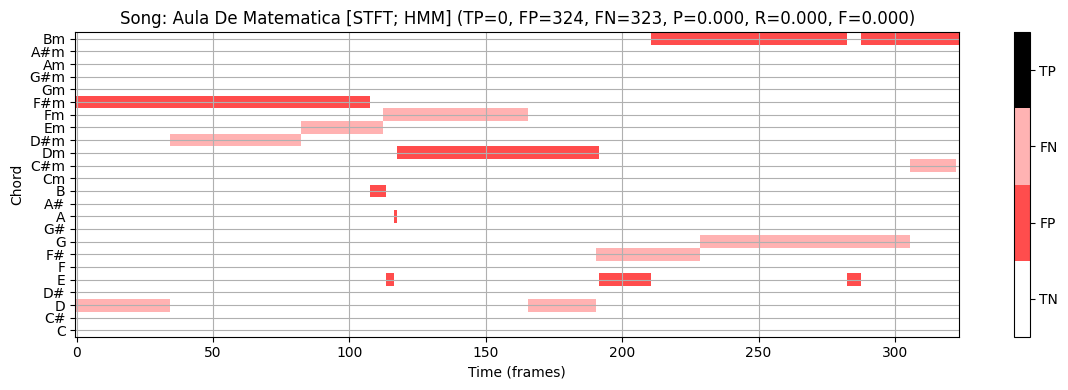

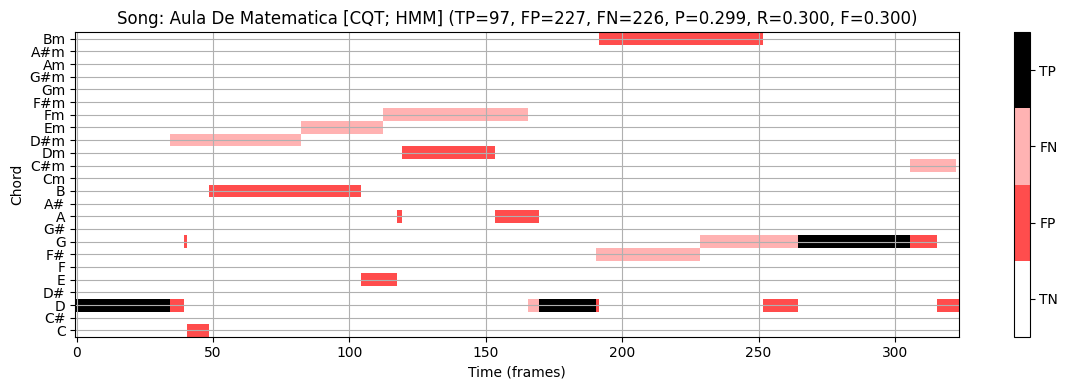

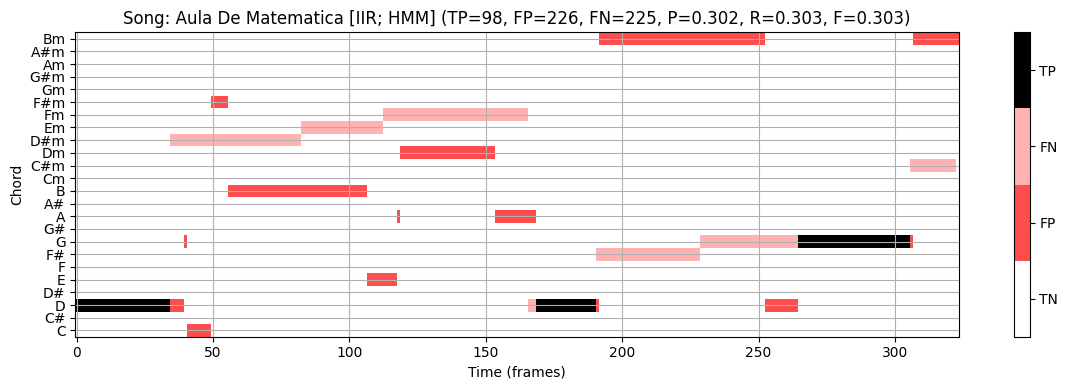

In [16]:
# Matriz mpb
p = 0.5
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0], df, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], df, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0], df, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title)  

c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)


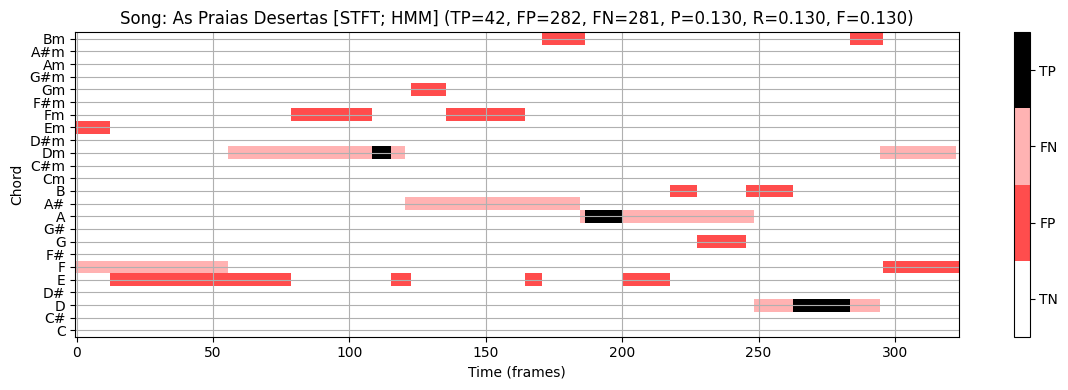

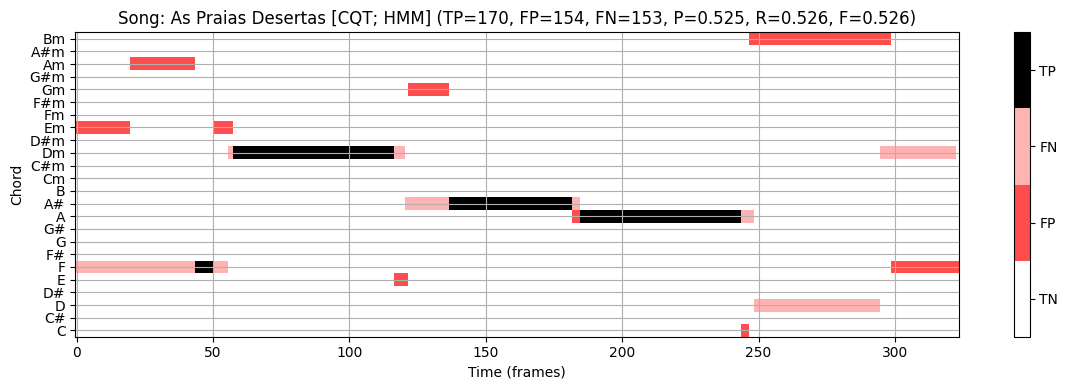

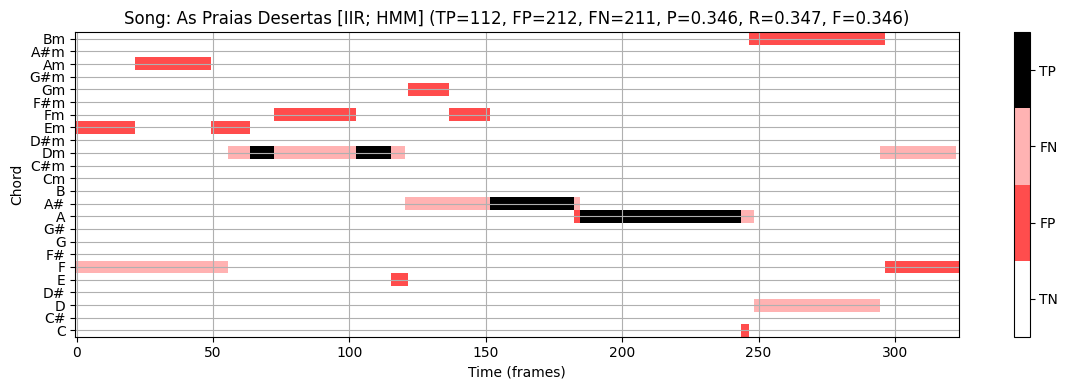

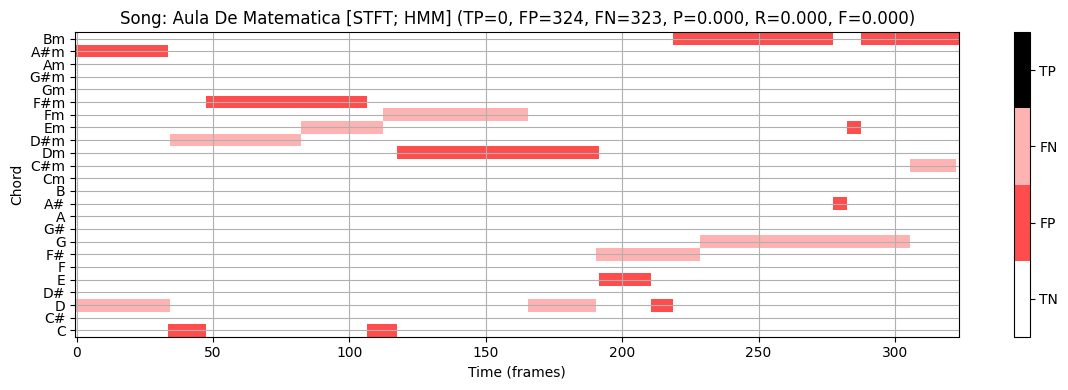

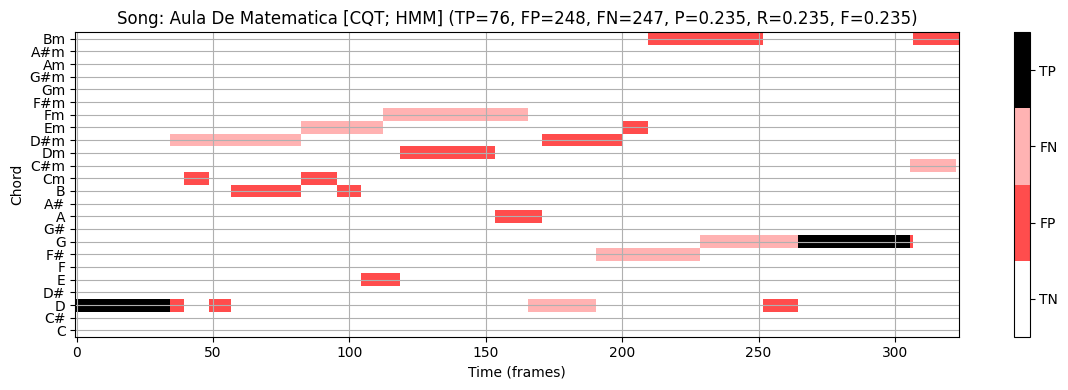

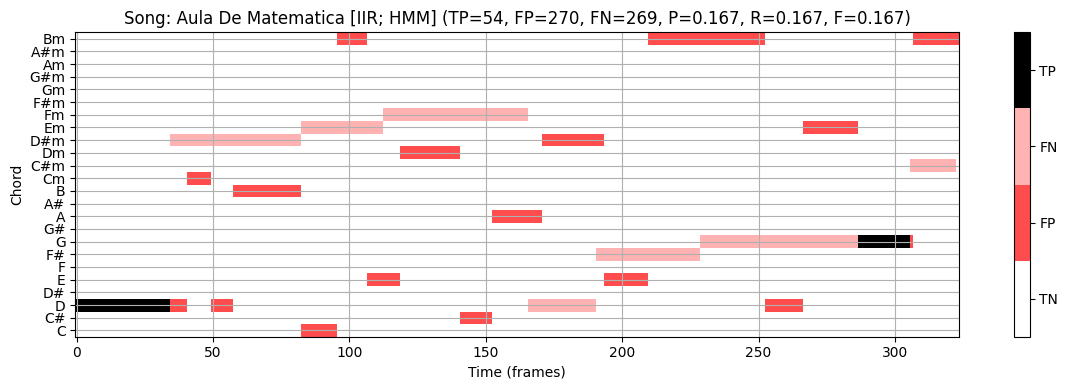

In [17]:
# Matriz Uniforme
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0])
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0])
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0])
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title)  

In [18]:
for s in song_selected:
    stft_p = find_best_p(X_dict_STFT[s], ann_dict_STFT[s][0], df)
    cqt_p = find_best_p(X_dict_CQT[s], ann_dict_CQT[s][0], df)
    iir_p = find_best_p(X_dict_IIR[s], ann_dict_IIR[s][0], df)
    print(f'Resultados para a música {song_dict[s][0]}:\n'
          f'===== STFT =====\n - p = {stft_p[1]}\n - F = {stft_p[0][1]}\n' +
          f'===== CQT =====\n - p = {cqt_p[1]}\n - F = {cqt_p[0][1]}\n' +
          f'===== IIR =====\n - p = {iir_p[1]}\n - F = {iir_p[0][1]}\n')

Resultados para a música As Praias Desertas:
===== STFT =====
 - p = [0.46, 0.48, 0.5, 0.52, 0.54, 0.56]
 - F = 0.25965996908809896
===== CQT =====
 - p = [0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9]
 - F = 0.5904173106646059
===== IIR =====
 - p = [0.86, 0.88, 0.9, 0.92]
 - F = 0.5471406491499227

Resultados para a música Aula De Matematica:
===== STFT =====
 - p = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14]
 - F = 0.04327666151468315
===== CQT =====
 - p = [0.28, 0.3]
 - F = 0.3338485316846985
===== IIR =====
 - p = [0.46, 0.48, 0.5, 0.52, 0.54]
 - F = 0.3029366306027821

